In [1]:
from gp import *


In [2]:
input_file = '../training_results/1D_500/train_inputs.json'
var_file = '../training_results/1D_500/train_outputs_log_var.json'
output_file = '../training_results/1D_500/train_outputs_log_mean.json'
input_type = 'I'
output_type = 'E'


In [3]:
gp = LPI_GP_1D(input_file = input_file, input_type = input_type, output_file = output_file, output_type = output_type, var_file = var_file)

In [4]:
gp.optimise_noise_GP()

l =  0.19306977288832497 var =  0.20671910509809963


In [5]:
gp.optimise_GP()

l =  0.10236136616184238 var =  0.19241792993472334


In [6]:
X_star = np.geomspace(1e14, 1.1e16, 1000)[:,None]


Y_star, sig_epi, sig_noise = gp.GP_predict(X_star, get_std=True)

In [7]:
X = gp.get_input()
Y = gp.get_output()

In [8]:
X_all = read_json_file('../training_results/1D_500/all_inputs.json')
Y_all = read_json_file('../training_results/1D_500/all_outputs.json')


In [9]:
if input_type == 'I':
    X_all = X_all[:,0]
if input_type == 'Ln':
    X_all = X_all[:,1]

if output_type == 'P':
    Y_all = Y_all[:,0].flatten()
if output_type == 'T':
    Y_all = Y_all[:,1].flatten()
if output_type == 'E':
    Y_all = Y_all[:,2].flatten()


 <ipython-input-10-77c2fc5eddfa>:11: UserWarning:color is redundantly defined by the 'color' keyword argument and the fmt string "kx" (-> color='k'). The keyword argument will take precedence.
 <ipython-input-10-77c2fc5eddfa>:12: UserWarning:color is redundantly defined by the 'color' keyword argument and the fmt string "kx" (-> color='k'). The keyword argument will take precedence.


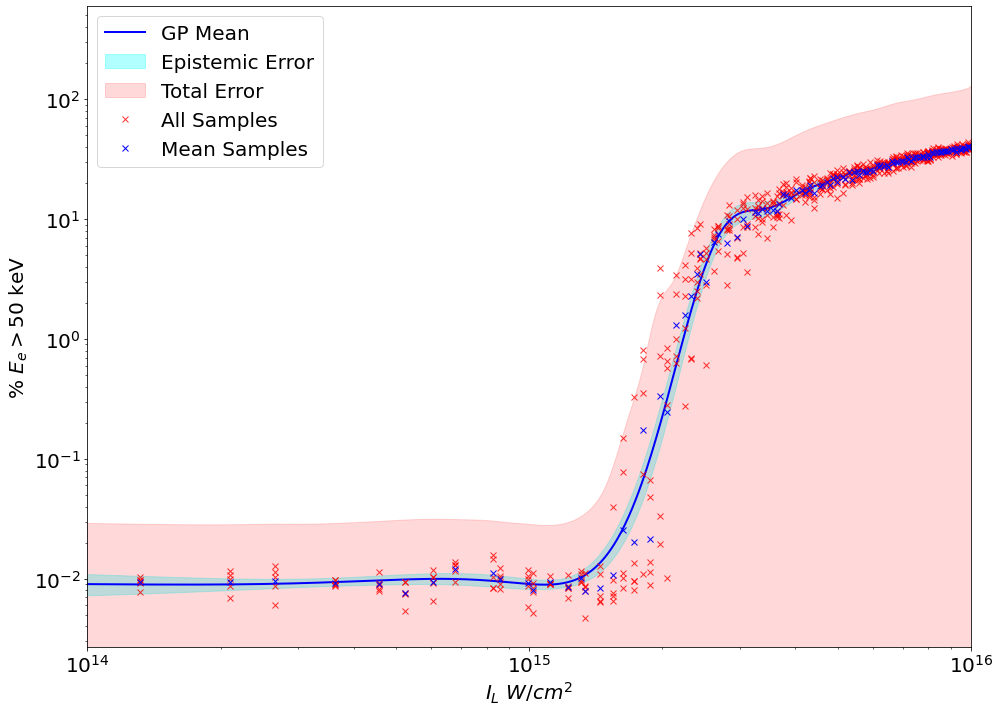

In [10]:
plt.rcParams["figure.figsize"] = [14, 10]
error_epi = 2*sig_epi*100
error_tot = 2*(sig_noise+sig_epi)*100

Y_s = Y_star.flatten()*100
X_s = X_star.flatten()

plt.loglog(X_s, Y_s, color = 'blue', label = 'GP Mean')
plt.fill_between(X_s, (Y_s-error_epi), (Y_s+error_epi), alpha = 0.3, color = 'cyan', label = 'Epistemic Error')
plt.fill_between(X_s, (Y_s-error_tot), (Y_s+error_tot), alpha = 0.15, color = 'red', label = 'Total Error')
plt.plot(X_all, Y_all*100, 'kx', color = 'red', label = 'All Samples', alpha = 0.8)
plt.plot(X, np.exp(Y)*100, 'kx', color = 'blue', label = 'Mean Samples')
plt.xlim(1e14, 1.0e16)
# plt.ylim(0, 45)
plt.ylabel(r'$\% \,\, E_{e} > 50$ keV')
plt.xlabel(r'$I_{L} \,\, W/cm^{2}$')
plt.legend(loc = 0)

In [11]:
# plt.rcParams["figure.figsize"] = [14, 10]
# fig, ax1 = plt.subplots()
# ax1.loglog(X_s, Y_s*X_s, color = 'blue', label = 'GP Mean')
# ax1.fill_between(X_s, (Y_s-error_epi)*X_s, (Y_s+error_epi)*X_s, alpha = 0.3, color = 'cyan', label = 'Epistemic Error')
# ax1.fill_between(X_s, (Y_s-error_tot)*X_s, (Y_s+error_tot)*X_s, alpha = 0.15, color = 'red', label = 'Total Error')
# ax1.plot(X_all, Y_all*X_all, 'kx', alpha = 0.8, color = 'red', label = 'All Samples')
# ax1.plot(X, Y*X, 'kx', color = 'blue', label = 'Mean Samples')
# ax1.set_ylim(3e10, 5e15)
# ax1.set_xlim(1e14, 1.5e16)
# ax1.set_xlabel(r'$I_{L} \,\, W/cm^{2}$')
# ax1.set_ylabel(r'$I_{SRS} \,\, W/cm^{2}$')
# ax1.legend(loc = 4)
# l, b, h, w = 0.18, .35, .6, .35
# ax2 = fig.add_axes([l, b, w, h])
# ax2.plot(X_s, Y_s, color = 'blue')
# ax2.fill_between(X_s, (Y_s-error_epi), (Y_s+error_epi), alpha = 0.3, color = 'cyan')
# ax2.fill_between(X_s, (Y_s-error_tot), (Y_s+error_tot), alpha = 0.15, color = 'red')
# ax2.plot(X_all, Y_all, 'kx', alpha = 0.8, color = 'red')
# ax2.plot(X, Y, 'kx', color = 'blue')
# ax2.set_ylim(0, 0.4)
# ax2.set_xlim(1e14, 1.1e16)
# ax2.set_ylabel(r'$\mathcal{P}$')
# ax2.set_xlabel(r'$I_{L} \,\, W/cm^{2}$')